<a href="https://colab.research.google.com/github/swardiantara/fp-kk-2021/blob/main/FP_KK_NER_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/alikmondal/named-entity-recognition-using-rnn

In [60]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [61]:
dataset_path = './dataset/ner_datasetreference.csv'
dataset = pd.read_csv(dataset_path, encoding= 'unicode_escape')
dataset.shape

(1048575, 5)

In [62]:
dataset.head()

,Sentence #,Word,POS,Tag,Class
0,Sentence: 1,Thousands,NNS,O,0
1,NaN,of,IN,O,0
2,NaN,demonstrators,NNS,O,0
3,NaN,have,VBP,O,0
4,NaN,marched,VBN,O,0


In [63]:
dataset.drop(['POS', 'Class'], inplace=True, axis=1)

In [64]:
dataset["Tag"].value_counts()

O        887908
B-geo     37644
B-tim     20333
B-org     20143
I-per     17251
B-per     16990
I-org     16784
B-gpe     15870
I-geo      7414
I-tim      6528
B-art       402
B-eve       308
I-art       297
I-eve       253
B-nat       201
I-gpe       198
I-nat        51
Name: Tag, dtype: int64

In [65]:
dataset.head()

,Sentence #,Word,Tag
0,Sentence: 1,Thousands,O
1,NaN,of,O
2,NaN,demonstrators,O
3,NaN,have,O
4,NaN,marched,O


ValueError: could not convert string to float: 'O'

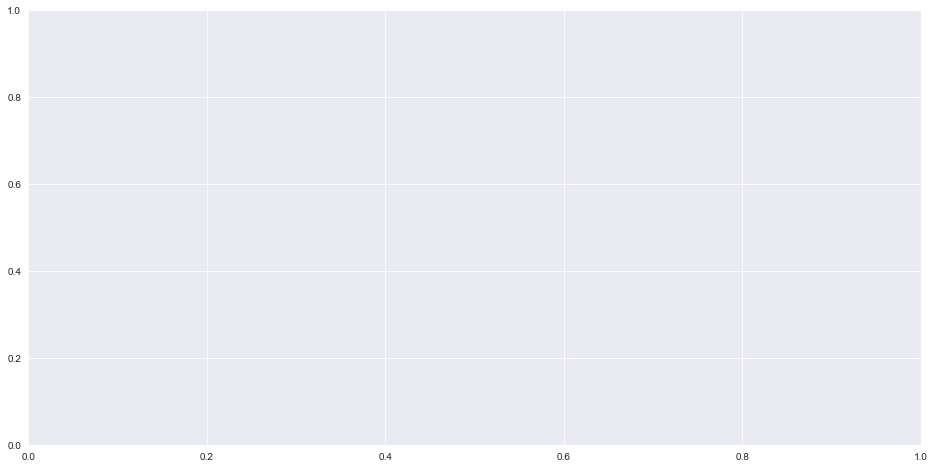

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (16,8))
sns.set_style('darkgrid')
sns.distplot(dataset['Tag'])
plt.tight_layout(pad=2)
plt.show()

In [67]:
def computeRatioAwal(dataset):
  negative = dataset.apply(lambda x : True if x['Tag'] == "O" else False, axis = 1)
  num_negative = len(negative[negative == True].index)
  num_positive = len(negative[negative == False].index)
  return num_negative / num_positive 
# Count number of True in the series

In [68]:
print(computeRatioAwal(dataset))

5.526386874716027


In [69]:
dataset_fillna = dataset.fillna(method='ffill', axis=0)
dataset_group = dataset_fillna.groupby(['Sentence #'], as_index=False)['Word', 'Tag'].agg(lambda x: list(x))

C:\Users\sward\.conda\envs\Data Mining\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [70]:
dataset_group

,Sentence #,Word,Tag
0,Sentence: 1,"[Thousands, of, demonstrators, have, marched, ...","[O, O, O, O, O, O, B-geo, O, O, O, O, O, B-geo..."
1,Sentence: 10,"[Iranian, officials, say, they, expect, to, ge...","[B-gpe, O, O, O, O, O, O, O, O, O, O, O, O, O,..."
2,Sentence: 100,"[Helicopter, gunships, Saturday, pounded, mili...","[O, O, B-tim, O, O, O, O, O, B-geo, O, O, O, O..."
3,Sentence: 1000,"[They, left, after, a, tense, hour-long, stand...","[O, O, O, O, O, O, O, O, O, O, O]"
4,Sentence: 10000,"[U.N., relief, coordinator, Jan, Egeland, said...","[B-geo, O, O, B-per, I-per, O, B-tim, O, B-geo..."
...,...,...,...
47954,Sentence: 9995,"[Opposition, leader, Mir, Hossein, Mousavi, ha...","[O, O, O, B-per, I-per, O, O, O, O, O, O, O, O..."
47955,Sentence: 9996,"[On, Thursday, ,, Iranian, state, media, publi...","[O, B-tim, O, B-gpe, O, O, O, O, O, O, O, O, B..."
47956,Sentence: 9997,"[Following, Iran, 's, disputed, June, 12, elec...","[O, B-geo, O, O, B-tim, I-tim, O, O, O, O, O, ..."
47957,Sentence: 9998,"[Since, then, ,, authorities, have, held, publ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."


In [71]:
geoList = ["Eastern", "Western", "Northern", "Southern"]
orgList = ["Agency", "Federation", "Community"]
perList = ["Woods", "Pearson", "Lee", "Mills", "Mason", "Andrews", "Frederick", "Christopher"]

In [72]:
import random
def generateRandomEntity(entityType):
  if(entityType == 'GEO'):
    return random.choice(geoList)
  elif(entityType == 'ORG'):
    return random.choice(orgList)
  else:
    return random.choice(perList)

In [73]:
def nerOversample(dataset):
  last = False
  for sentence in range(0, dataset.shape[0]):
    # if (row == dataset.shape[0] - 1): last = True
    # if((dataset.loc[row, 'Tag'] == 'B-geo' and last) or (dataset.loc[row, 'Tag'] == 'B-geo' and dataset.loc[row+1, 'Tag'] == 'O')):
    #   dataset.loc[row, 'Tag'] = 'I-geo'
    #   dataset.insert(row, [dataset.loc[row, 'Sentence #'], generateRandomEntity('GEO'), 'B-geo'])

    # elif((dataset.loc[row, 'Tag'] == 'B-org' and last) or (dataset.loc[row, 'Tag'] == 'B-org' and dataset.loc[row+1, 'Tag'] == 'O')):
    #   dataset.insert(row+1, [dataset.loc[row, 'Sentence #'], generateRandomEntity('ORG'), 'I-org'])
    # elif((dataset.loc[row, 'Tag'] == 'B-per' and last) or (dataset.loc[row, 'Tag'] == 'B-per' and dataset.loc[row+1, 'Tag'] == 'O')):
    #   dataset.insert(row+1, [dataset.loc[row, 'Sentence #'], generateRandomEntity('PER'), 'I-per'])

    # sentence = 10002
    for tag in range(0, len(dataset.loc[sentence, 'Tag'])):
      if (tag == len(dataset.loc[sentence, 'Tag']) - 1): last = True
      if((dataset.loc[sentence, 'Tag'][tag] == 'B-geo' and last == True) or (dataset.loc[sentence, 'Tag'][tag] == 'B-geo' and dataset.loc[sentence, 'Tag'][tag+1] == 'O')):
        dataset.loc[sentence, 'Tag'][tag] = 'I-geo'
        # dataset.loc[sentence, 'Tag_idx'][tag] = tag2idx.get('I-geo')
        dataset.loc[sentence, 'Word'].insert(tag, generateRandomEntity('GEO'))
        dataset.loc[sentence, 'Tag'].insert(tag, 'B-geo')
        # dataset.loc[sentence, 'Tag_idx'].insert(tag, tag2idx.get('B-geo'))
      elif((dataset.loc[sentence, 'Tag'][tag] == 'B-org' and last == True) or (dataset.loc[sentence, 'Tag'][tag] == 'B-org' and dataset.loc[sentence, 'Tag'][tag+1] == 'O')):
        dataset.loc[sentence, 'Word'].insert(tag+1, generateRandomEntity('ORG'))
        dataset.loc[sentence, 'Tag'].insert(tag+1, 'I-org')
        # dataset.loc[sentence, 'Tag_idx'].insert(tag+1, tag2idx.get('I-org'))
      elif((dataset.loc[sentence, 'Tag'][tag] == 'B-per' and last == True) or (dataset.loc[sentence, 'Tag'][tag] == 'B-per' and dataset.loc[sentence, 'Tag'][tag+1] == 'O')):
        dataset.loc[sentence, 'Word'].insert(tag+1, generateRandomEntity('PER'))
        dataset.loc[sentence, 'Tag'].insert(tag+1, 'I-per')
        # dataset.loc[sentence, 'Tag_idx'].insert(tag+1, tag2idx.get('I-per'))
      # print(dataset.loc[sentence, 'Word'][tag], dataset.loc[sentence, 'Tag'][tag], dataset.loc[sentence, 'Tag_idx'][tag])
    #update ratio 
    # dataset.loc[sentence, 'Ratio'] = computeSentenceRatio(dataset.loc[sentence, 'Tag'])
  return dataset
      # print(dataset.loc[0, 'Tag'][tag])
      # print(dataset.loc[0, 'Tag_idx'][tag])

In [74]:
dataset_untuk_sample = dataset_group.copy()

In [75]:
dataset_sampled = nerOversample(dataset_untuk_sample)

In [76]:
dataset_sampled

,Sentence #,Word,Tag
0,Sentence: 1,"[Thousands, of, demonstrators, have, marched, ...","[O, O, O, O, O, O, B-geo, I-geo, O, O, O, O, O..."
1,Sentence: 10,"[Iranian, officials, say, they, expect, to, ge...","[B-gpe, O, O, O, O, O, O, O, O, O, O, O, O, O,..."
2,Sentence: 100,"[Helicopter, gunships, Saturday, pounded, mili...","[O, O, B-tim, O, O, O, O, O, B-geo, I-geo, O, ..."
3,Sentence: 1000,"[They, left, after, a, tense, hour-long, stand...","[O, O, O, O, O, O, O, O, O, O, O]"
4,Sentence: 10000,"[Southern, U.N., relief, coordinator, Jan, Lee...","[B-geo, I-geo, O, O, B-per, I-per, I-per, O, B..."
...,...,...,...
47954,Sentence: 9995,"[Opposition, leader, Mir, Hossein, Frederick, ...","[O, O, O, B-per, I-per, I-per, O, O, O, O, O, ..."
47955,Sentence: 9996,"[On, Thursday, ,, Iranian, state, media, publi...","[O, B-tim, O, B-gpe, O, O, O, O, O, O, O, O, B..."
47956,Sentence: 9997,"[Following, Northern, Iran, 's, disputed, June...","[O, B-geo, I-geo, O, O, B-tim, I-tim, O, O, O,..."
47957,Sentence: 9998,"[Since, then, ,, authorities, have, held, publ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."


In [77]:
word_list = []
tag_list = []
sentence_list = []
for sentence in range(0, dataset_sampled.shape[0]):
  sentence_array = [dataset_sampled.loc[sentence, 'Sentence #']] * len(dataset_sampled.loc[sentence, 'Word'])
  sentence_list = sentence_list + sentence_array
  word_list = word_list + dataset_sampled.loc[sentence, 'Word']
  tag_list = tag_list + dataset_sampled.loc[sentence, 'Tag']
  # word_list.append(dataset_sampled.loc[sentence, 'Word'])
  # tag_list = tag_list.append(dataset_sampled.loc[sentence, 'Tag'])

In [78]:
print(len(sentence_list))
print(len(word_list))
print(len(tag_list))

1119772
1119772
1119772


In [82]:
# # df_after_sampling.loc[0, "Word"] = dataset_sampled.
# word = concat()
half = len(tag_list) / 2
df_after_sampling = pd.DataFrame({'Sentence #': sentence_list, 'Word': word_list, 'Tag': tag_list})
df_after_sampling.loc[:half].to_csv("./dataset/kaggle_oversampled_2nd_1.csv")
df_after_sampling.loc[half:].to_csv("./dataset/kaggle_oversampled_2nd_2.csv")

In [83]:
df_after_sampling

,Sentence #,Word,Tag
0,Sentence: 1,Thousands,O
1,Sentence: 1,of,O
2,Sentence: 1,demonstrators,O
3,Sentence: 1,have,O
4,Sentence: 1,marched,O
...,...,...,...
1119767,Sentence: 9999,weight,O
1119768,Sentence: 9999,in,O
1119769,Sentence: 9999,gold,O
1119770,Sentence: 9999,.,O


In [84]:
print(computeRatioAwal(df_after_sampling))

3.8294344960839113


In [85]:
df_after_sampling["Tag"].value_counts()

O        887908
I-geo     42247
B-geo     37644
I-org     36388
I-per     34011
B-tim     20333
B-org     20143
B-per     16990
B-gpe     15870
I-tim      6528
B-art       402
B-eve       308
I-art       297
I-eve       253
B-nat       201
I-gpe       198
I-nat        51
Name: Tag, dtype: int64

In [86]:
from itertools import chain
def get_dict_map(dataset, token_or_tag):
    tok2idx = {}
    idx2tok = {}
    
    if token_or_tag == 'token':
        vocab = list(set(dataset['Word'].to_list()))
    else:
        vocab = list(set(dataset['Tag'].to_list()))
    
    idx2tok = {idx:tok for  idx, tok in enumerate(vocab)}
    tok2idx = {tok:idx for  idx, tok in enumerate(vocab)}
    return tok2idx, idx2tok
token2idx, idx2token = get_dict_map(df_after_sampling, 'token')
tag2idx, idx2tag = get_dict_map(df_after_sampling, 'tag')

In [87]:
print(tag2idx)

{'I-org': 0, 'B-art': 1, 'B-eve': 2, 'B-per': 3, 'B-org': 4, 'B-gpe': 5, 'I-eve': 6, 'I-per': 7, 'I-art': 8, 'I-tim': 9, 'B-nat': 10, 'B-tim': 11, 'I-nat': 12, 'I-gpe': 13, 'I-geo': 14, 'B-geo': 15, 'O': 16}


In [88]:
print(tag2idx.get('B-geo'))

15


In [89]:
df_after_sampling['Word_idx'] = df_after_sampling['Word'].map(token2idx)
df_after_sampling['Tag_idx'] = df_after_sampling['Tag'].map(tag2idx)
df_after_sampling_fillna = df_after_sampling.fillna(method='ffill', axis=0)
# Groupby and collect columns
df_after_sampling_group = df_after_sampling_fillna.groupby(['Sentence #'], as_index=False)['Word', 'Tag', 'Word_idx', 'Tag_idx'].agg(lambda x: list(x))

C:\Users\sward\.conda\envs\Data Mining\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


In [90]:
df_after_sampling_group

,Sentence #,Word,Tag,Word_idx,Tag_idx
0,Sentence: 1,"[Thousands, of, demonstrators, have, marched, ...","[O, O, O, O, O, O, B-geo, I-geo, O, O, O, O, O...","[21208, 31296, 8254, 31674, 1082, 16025, 20277...","[16, 16, 16, 16, 16, 16, 15, 14, 16, 16, 16, 1..."
1,Sentence: 10,"[Iranian, officials, say, they, expect, to, ge...","[B-gpe, O, O, O, O, O, O, O, O, O, O, O, O, O,...","[14087, 21366, 21853, 22902, 13108, 11649, 279...","[5, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16..."
2,Sentence: 100,"[Helicopter, gunships, Saturday, pounded, mili...","[O, O, B-tim, O, O, O, O, O, B-geo, I-geo, O, ...","[8549, 10150, 24831, 32806, 29604, 27342, 3231...","[16, 16, 11, 16, 16, 16, 16, 16, 15, 14, 16, 1..."
3,Sentence: 1000,"[They, left, after, a, tense, hour-long, stand...","[O, O, O, O, O, O, O, O, O, O, O]","[30823, 6198, 8514, 30656, 32626, 15994, 24172...","[16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]"
4,Sentence: 10000,"[Southern, U.N., relief, coordinator, Jan, Lee...","[B-geo, I-geo, O, O, B-per, I-per, I-per, O, B...","[20277, 12102, 21431, 4, 35155, 34971, 31742, ...","[15, 14, 16, 16, 3, 7, 7, 16, 11, 16, 15, 14, ..."
...,...,...,...,...,...
47954,Sentence: 9995,"[Opposition, leader, Mir, Hossein, Frederick, ...","[O, O, O, B-per, I-per, I-per, O, O, O, O, O, ...","[7925, 58, 31424, 13764, 20989, 2796, 9203, 31...","[16, 16, 16, 3, 7, 7, 16, 16, 16, 16, 16, 16, ..."
47955,Sentence: 9996,"[On, Thursday, ,, Iranian, state, media, publi...","[O, B-tim, O, B-gpe, O, O, O, O, O, O, O, O, B...","[12035, 21775, 24351, 14087, 4164, 3028, 11507...","[16, 11, 16, 5, 16, 16, 16, 16, 16, 16, 16, 16..."
47956,Sentence: 9997,"[Following, Northern, Iran, 's, disputed, June...","[O, B-geo, I-geo, O, O, B-tim, I-tim, O, O, O,...","[30195, 12348, 7725, 33446, 11768, 1294, 20768...","[16, 15, 14, 16, 16, 11, 9, 16, 16, 16, 16, 16..."
47957,Sentence: 9998,"[Since, then, ,, authorities, have, held, publ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[4672, 26735, 24351, 5628, 31674, 28171, 21437...","[16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 1..."


In [91]:
import numpy as np 
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

def get_pad_train_test_val(dataset_grouped, dataset):

    #get max token and tag length
    n_token = len(list(set(dataset['Word'].to_list())))
    n_tag = len(list(set(dataset['Tag'].to_list())))

    #Pad tokens (X var)    
    tokens = dataset_grouped['Word_idx'].tolist()
    maxlen = max([len(s) for s in tokens])
    pad_tokens = pad_sequences(tokens, maxlen=maxlen, dtype='int32', padding='post', value= n_token - 1)

    #Pad Tags (y var) and convert it into one hot encoding
    tags = dataset_grouped['Tag_idx'].tolist()
    pad_tags = pad_sequences(tags, maxlen=maxlen, dtype='int32', padding='post', value= tag2idx["O"])
    n_tags = len(tag2idx)
    pad_tags = [to_categorical(i, num_classes=n_tags) for i in pad_tags]
    
    #Split train, test and validation set
    tokens_, test_tokens, tags_, test_tags = train_test_split(pad_tokens, pad_tags, test_size=0.1, train_size=0.9, random_state=2020)
    train_tokens, val_tokens, train_tags, val_tags = train_test_split(tokens_,tags_,test_size = 0.25,train_size =0.75, random_state=2020)

    print(
        'train_tokens length:', len(train_tokens),
        '\ntrain_tags length:', len(train_tags),
        '\ntest_tokens length:', len(test_tokens),
        '\ntest_tags:', len(test_tags),
        '\nval_tokens:', len(val_tokens),
        '\nval_tags:', len(val_tags),
    )
    
    return train_tokens, val_tokens, test_tokens, train_tags, val_tags, test_tags

In [92]:
train_tokens, val_tokens, test_tokens, train_tags, val_tags, test_tags = get_pad_train_test_val(df_after_sampling_group, df_after_sampling)
train_tags = np.array(train_tags)
val_tags = np.array(val_tags)
test_tags = np.array(test_tags)
print('train_tags: ',train_tags.shape,'val_tags: ',val_tags.shape,'test_tags: ',test_tags.shape)

train_tokens length: 32372 
train_tags length: 32372 
test_tokens length: 4796 
test_tags: 4796 
val_tokens: 10791 
val_tags: 10791
train_tags:  (32372, 109, 17) val_tags:  (10791, 109, 17) test_tags:  (4796, 109, 17)


In [93]:
from sklearn.utils import class_weight

train_temp_tags = np.ravel(np.argmax(train_tags, axis=-1))
print(len(train_temp_tags))

3528548


In [94]:
class_weights = class_weight.compute_class_weight(
    class_weight ='balanced', 
    classes = np.unique(train_temp_tags), 
    y = train_temp_tags
    )
class_weight_dict = dict(enumerate(class_weights))
print(class_weight_dict)

train_label = np.argmax(train_tags, axis=-1)
print(train_tokens.shape)
print(train_label.shape)

{0: 8.414547657146128, 1: 736.0342094284522, 2: 1022.4711677774558, 3: 18.21674978574895, 4: 15.296753412839822, 5: 19.418247456153384, 6: 1128.0524296675192, 7: 9.08207084356452, 8: 1002.7132708155726, 9: 47.2805574165885, 10: 1526.188581314879, 11: 15.149379392659188, 12: 6486.301470588235, 13: 1647.3146591970121, 14: 7.281587337618787, 15: 8.191713910285877, 16: 0.06154951575920901}
(32372, 109)
(32372, 109)


In [95]:
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional, Input
from tensorflow.keras.utils import plot_model
from numpy.random import seed
seed(1)
tensorflow.random.set_seed(2)

In [96]:
input_dim = len(list(set(df_after_sampling['Word'].to_list())))+1
output_dim = 64
input_length = max([len(s) for s in df_after_sampling_group['Word_idx'].tolist()])
n_tags = len(tag2idx)

In [47]:
def get_bilstm_lstm_model():
    model = Sequential()
    model.add(Embedding(input_dim=input_dim, output_dim=output_dim, input_length=input_length))
    model.add(Bidirectional(LSTM(units=output_dim, return_sequences=True, dropout=0.2, recurrent_dropout=0.2), merge_mode = 'concat'))
    model.add(LSTM(units=output_dim, return_sequences=True, dropout=0.5, recurrent_dropout=0.5))
    model.add((Dense(n_tags, activation="softmax")))

    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    
    return model

In [50]:
maj_index = tag2idx['O']

''' Change it More for Better Fine-Tuning '''

class_weight_dict[maj_index] = 28.5277954105731576 
print(class_weight_dict)
sample_weights = np.ones(shape=(len(train_label), train_label.shape[-1]))
for i in range(17):
    sample_weights[train_label == i] = class_weight_dict.get(i)
print(sample_weights.shape[-1])

{0: 8.414547657146128, 1: 736.0342094284522, 2: 1022.4711677774558, 3: 18.21674978574895, 4: 15.296753412839822, 5: 19.418247456153384, 6: 1128.0524296675192, 7: 9.08207084356452, 8: 1002.7132708155726, 9: 47.2805574165885, 10: 1526.188581314879, 11: 15.149379392659188, 12: 6486.301470588235, 13: 1647.3146591970121, 14: 7.281587337618787, 15: 8.191713910285877, 16: 28.52779541057316}
109


In [46]:
nlp_model = get_bilstm_lstm_model()
plot_model(nlp_model)
his = nlp_model.fit(train_tokens, train_label , batch_size = 64, epochs=5, validation_split=0.2, sample_weight = sample_weights) 
tf.keras.models.save_model(nlp_model, filepath  = "/content/drive/MyDrive/Colab Notebooks/ner-kk/bilstm_kaggle_sampled_3.h5")

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 109, 64)           2251072   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 109, 128)          66048     
_________________________________________________________________
lstm_3 (LSTM)                (None, 109, 64)           49408     
_________________________________________________________________
dense_1 (Dense)              (None, 109, 17)           1105      
Total params: 2,367,633
Trainable params: 2,367,633
Non-trainable params: 0
_________________________________________________________________
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


ValueError: Found a sample_weight array for an input with shape (32372, 109). Timestep-wise sample weighting (use of sample_weight_mode="temporal") is restricted to outputs that are at least 3D, i.e. that have a time dimension.

In [1]:
nlp_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/ner-kk/rnn_model_sampled_2.h5')

y_test = np.argmax(test_tags, axis=-1)
print(test_tokens.shape,y_test.shape)
nlp_model.evaluate(test_tokens, y_test)

NameError: ignored